
# Density-Based Clustering

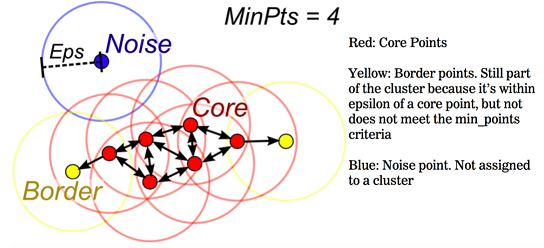

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision. 

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor.
Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this section, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.


* DBSCAN, doğrusal olmayan veri noktaları için bir kümeleme çözümüdür . Bir kümenin düşük yoğunluklu bölgelerle çevrili yüksek yoğunluklu bir alan olduğu fikrine dayanmaktadır 
* Density-based clustering algorithms locate regions of high density that are separated from one another by regions of low density.
* Density-based clustering algorithms are proper for arbitrary shape clusters.
* Density-based clustering algorithms have notion of outliers. But K-Means  is not

merkezi etraftaki noktalarin ortalamasi üzerinden hesaplamak yerine, core objectler üzerinden hesaplar, öyle ki bu core object'ler önceden belirlenmis iki tane parametreye bagli olarak belirlenirler.

bu iki parametre `minpts` ve `epsilon` diye adlandirilir.

**eps(epsilon):** maximum radious of the neighborhood yanina sectigimiz noktaya komsu olarak degerlendirilecek bir noktanin maximum ne kadar buyuk bir alanda kalabilecegini belirtiyor.
öyle bir epsilon seceriz ki; bir nokta secildiginde, bu noktanin epsilon yaricapinda kalan alani gözden gecirmek suretiyle algoritmayi kuracagiz.

**minpts:** sectigimiz epsilon yaricapli daire (veya yüksek boyutlarda sphere) icinde en az kac nokta olmali ki, bu dairenin merkezi bir core object sayilsin. yani minpts, bu radiusta en az kac komsumuz oldugunu belirtiyor.

tabii ki bu yöntemin bir algoritmaya dönüstürülebilmesi icin bir epsilon ve bir minpts secilmelidir, bunun icin kullanilan en yaygin yöntem ise k-distance grafigi cizmektir.

minpts ve eps degerlerini cebe koyduktan sonra pointleri tek tek geziyoruz ve hepsine bir etiket veriyoruz bu etiket ya core object, ya border object ya da noise oldugunu belirtecek o pointin.

bir noktaya core object demek icin bu noktanin eps radiusinda en az minpts sayisi kadar komsusu olmasi gerekiyor eger ki bu kosulu sagliyorsa core object diyoruz, sayet saglamiyorsa ya noise ya border pointtir buna ise soyle karar veriyoruz:

elimizdeki point bir core objenin eps neighborhoodundaysa, bu point border objecttir degilse de noisetur.

bu yukaridaki algoritmayi koda doktukten sonra elimizde bulunan tum pointleri core, border veya noise olarak labellamis olduk ardindan yapmamiz gereken tek sey clusteringe baslamak bu da soyle isliyor:

noise pointlerin hepsini eliminate ediyoruz yani bunlar hicbir kategoriye girmiyor.
daha sonra ise her core point icin daha onceden bir clustera tanimlamadiysak yeni bir cluster yaratiyoruz ve bu pointe density connected olan tum pointleri bu clustera atiyoruz peki density connected ne demek dersek su resimden inceleyebilirsiniz, burda p ve q density connected pointler.

bunun ardindan elimizde sadece border pointler kalma olasiligi kaliyor ki bunu da soyle handle ediyoruz, border pointler hepsini ustteki for loopunda yarattigimiz clusterlardan hangisine en yakinsa tek tek ona atiyoruz.
Parameters accepted:
eps: It decides how close points should be to each other, to be considered a part of a cluster. It acts as a threshold value.
minPoints: the minimum number of points to form a dense region e.g. if we set the minPoints parameter as 8, then we need at least 8 points to form a dense region(cluster).

**Pros of DBSCAN:**
* Is great at separating clusters of high density versus clusters of low density within a given dataset.
* Less sensitive to outliers.
* DBSCAN struggles with clusters of similar density.
* DBSCAN is not efficient with high dimensionality data.
* Slower than K-Means.


In [195]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans, AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
%matplotlib inline

### Data generation

The function below will generate the data points and requires these inputs:

<ul>
    <li> <b>centroidLocation</b>: Coordinates of the centroids that will generate the random data. </li>
    <ul> <li> Example: input: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>n_samples</b>: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation) </li>
    <ul> <li> Example: 1500 </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation between the clusters. The larger the number, the further the spacing. </li>
    <ul> <li> Example: 0.5 </li> </ul>
</ul>


Use <b>createDataPoints</b> with the <b>3 inputs</b> and store the output into variables <b>X</b> and <b>y</b>.


In [196]:
centroidLocation=[[4,3], [2,-1], [-1,4]]
X, y =make_blobs(n_samples=1500, 
                 centers=centroidLocation, 
                 cluster_std=0.5,
                random_state=42)
X = StandardScaler().fit_transform(X)

### Modeling

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms  which works based on density of object.
The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points  
**Epsilon** determine a specified radius that if includes enough number of points within, we call it dense area. maximum radious of the neighborhood yanina sectigimiz noktaya komsu olarak degerlendirilecek bir noktanin maximum ne kadar buyuk bir alanda kalabilecegini belirtiyor.
öyle bir epsilon seceriz ki; bir nokta secildiginde, bu noktanin epsilon yaricapinda kalan alani gözden gecirmek suretiyle algoritmayi kuracagiz.

**minimumSamples** determine the minimum number of data points we want in a neighborhood to define a cluster. sectigimiz epsilon yaricapli daire (veya yüksek boyutlarda sphere) icinde en az kac nokta olmali ki, bu dairenin merkezi bir core object sayilsin. yani minpts, bu radiusta en az kac komsumuz oldugunu belirtiyor.


In [197]:
db = DBSCAN(eps=0.25, min_samples=7).fit(X)
core_samples = db.core_sample_indices_
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [198]:
# -1 is noise data
Counter(db.labels_)

Counter({0: 497, 1: 499, 2: 499, -1: 5})

### Distinguish outliers

Lets Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.


In [199]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)

### Data visualization


In [200]:
df=pd.DataFrame(X,columns=['x','y'])
df['db_clusters']=y

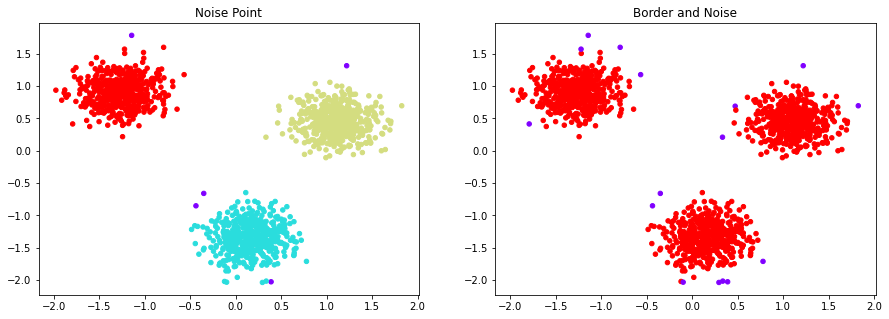

In [203]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=db.labels_,s=20,cmap="rainbow")
plt.title('Noise Point')

plt.subplot(1,2,2)
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=core_samples_mask,s=20,cmap="rainbow")
plt.title('Border and Noise')
plt.show()

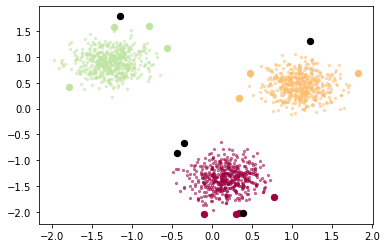

In [202]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=5, c=[col],alpha=0.5, cmap="rainbow")
    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=40, c=[col],alpha=1, cmap="rainbow")

## K-Means

To better underestand differences between partitional and density-based clusteitng, try to cluster the above dataset into 3 clusters using k-Means.  


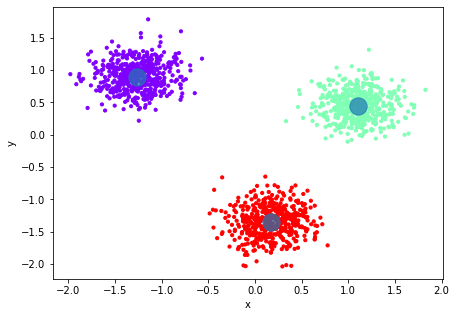

In [187]:
# write your code here
kmeans = KMeans(n_clusters = 3).fit(df.iloc[:,:-1])
labels = kmeans.labels_

plt.figure(figsize=(7,5))
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kmeans.labels_,s=10,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300,alpha=0.7, label = 'Centroids')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()